### 生成数据集

In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000) # 生成特征（X）和标签 （y）

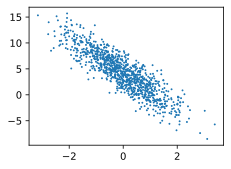

In [2]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),labels.detach().numpy(), 1) #后面的 1 代表点的大小，[:, 1]特征代表第二个维度和标签的关系

### 生成小批量数据

In [3]:
def load_array(data_arrays, batch_size, is_train = True):
    dataset = data.TensorDataset(*data_arrays) #生成数据集
    return data.DataLoader(dataset, batch_size, shuffle = is_train) #

batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter)) #获取迭代器生成的一次数据，next 函数用于获取下一次迭代产生的数据，如1，2，3，4次迭代

[tensor([[ 0.9726, -2.4198],
         [-0.5469,  1.1277],
         [-0.4901,  1.5896],
         [-0.4008,  0.2709],
         [ 1.1859, -0.1003],
         [ 0.1528, -0.3041],
         [ 0.6071, -1.0462],
         [ 1.3301, -0.6863],
         [ 0.4831,  0.0185],
         [-0.7407, -0.0297]]),
 tensor([[14.3621],
         [-0.7294],
         [-2.1807],
         [ 2.4914],
         [ 6.9018],
         [ 5.5390],
         [ 8.9789],
         [ 9.1881],
         [ 5.1316],
         [ 2.8040]])]

### 模型定义

`Sequential` 用于构建顺序容器，允许多个层顺序组合到一起（知识补充）

`nn.Linear` 表示神经网络的线性层，也叫全连接层

In [4]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) #这里表示自变量有两个，因变量有一个

In [5]:
net[0].weight.data.normal_(0, 0.01) #权重 'w'
net[0].bias.data.fill_(0) #偏差 `b`设为 0，加快收敛速度

tensor([0.])

### 损失函数定义

In [6]:
loss = nn.MSELoss() #均方误差 Mean square error loss

### 优化方法

In [7]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.03) #parameters 就是 'w' 和 'b', lr = learn rate

### 训练过程

In [8]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter: # 拿出小批量
        l = loss(net(X), y) # 损失
        trainer.zero_grad() # 优化器把梯度清零
        l.backward()
        trainer.step() #step 进行模型更新
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000264
epoch 2, loss 0.000100
epoch 3, loss 0.000098
